In [1]:
!pip install pandas

     ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
     - -------------------------------------- 0.4/11.6 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.1/11.6 MB 5.4 MB/s eta 0:00:02
     ----- ---------------------------------- 1.6/11.6 MB 5.5 MB/s eta 0:00:02
     --------- ------------------------------ 2.7/11.6 MB 6.8 MB/s eta 0:00:02
     ------------ --------------------------- 3.6/11.6 MB 7.6 MB/s eta 0:00:02
     --------------- ------------------------ 4.6/11.6 MB 8.0 MB/s eta 0:00:01
     -------------------- ------------------- 5.9/11.6 MB 8.8 MB/s eta 0:00:01
     ------------------------- -------------- 7.4/11.6 MB 9.4 MB/s eta 0:00:01
     -------------------------- ------------- 7.6/11.6 MB 8.7 MB/s eta 0:00:01
     --------------------------- ------------ 7.9/11.6 MB 8.5 MB/s eta 0:00:01
     ---------------------------- ----------- 8.3/11.6 MB 8.3 MB/s eta 0:00:01
     ------------------------------ --------- 8.8/11.6 MB 8

In [12]:
import pandas as pd 

data_path ="D:/rokey/lyft-motion-prediction-autonomous-vehicles/"

file1="multi_mode_sample_submission.csv"
file2="single_mode_sample_submission.csv"


#데이터프레임 생성
df1=pd.read_csv(f"{data_path}/{file1}")
df2=pd.read_csv(f"{data_path}/{file2}")

print(f"first sample_submission.csv file:\n",df1.head())
print(f"second sample_submission.csv file:\n",df2.head())


first sample_submission.csv file:
              timestamp  track_id    conf_0    conf_1    conf_2  coord_x00  \
0  1578606007801600134         2  0.365883  0.539550  0.094566   -0.96744   
1  1578606032802467516         4  0.000872  0.530018  0.469110   -1.59941   
2  1578606032802467516         5  0.546090  0.277373  0.176537   -0.73589   
3  1578606032802467516        81  0.163382  0.172389  0.664229   -0.95323   
4  1578606032802467516       130  0.271400  0.469058  0.259542   -0.31472   

   coord_y00  coord_x01  coord_y01  coord_x02  ...  coord_x245  coord_y245  \
0   -0.55161    1.89614   -1.15831   -1.45882  ...    -3.32486     1.13493   
1    0.16196    1.38821   -1.00800    0.34283  ...    -0.29144     0.35987   
2    0.54266    2.06891   -0.90888   -0.07916  ...    -0.00650     0.20776   
3    0.67754   -0.06146    0.69075   -0.47868  ...    -0.35571     0.37986   
4   -0.41110   -0.35072   -0.09993   -0.24402  ...    -0.77553    -0.51392   

   coord_x246  coord_y246  coord_

In [ ]:
!pip uninstall numpy

In [8]:
import zarr
import os
import pandas as pd

#디렉토리 내 파일들 확인
print(os.listdir("D:/rokey/lyft-motion-prediction-autonomous-vehicles/scenes"))

zarr_file=zarr.open_group("D:/rokey/lyft-motion-prediction-autonomous-vehicles/scenes/sample.zarr",mode="r")

print(zarr_file.tree())

frame=zarr_file["frames"][:]

print(type(frame))
print(frame.shape)
print(frame.size)
print(frame[:5])



#구조화 된 배열을 df으로 변환
df=pd.DataFrame(frame.tolist(),columns=frame.dtype.names)

#나노초->초로 변환 (밑에서 time column 사용할거라서)
df['time']=df['timestamp']/1e9  

#ego_translation을 x,y,z로 분리해 새로운 columns 생성
df["ego_translation_x"]=df["ego_translation"].apply(lambda x:x[0])
df["ego_translation_y"]=df["ego_translation"].apply(lambda x:x[1])
df["ego_translation_z"]=df["ego_translation"].apply(lambda x:x[2])

#3*3 매트릭스에서 각각의 값 분리->새로운 columns 생성
for i in range(3):
    for j in range(3):
        df[f"ego_rotation_{i}{j}"]=df["ego_rotation"].apply(lambda x:x[i][j])
       
#불필요한 columns 제거
df.drop(columns=["ego_translation","ego_rotation"],inplace=True) 

print(df.head())

['mask.npz', 'sample.zarr', 'test.zarr', 'train.zarr', 'validate.zarr']
/
 ├── agents (1893736,) [('centroid', '<f8', (2,)), ('extent', '<f4', (3,)), ('yaw', '<f4'), ('velocity', '<f4', (2,)), ('track_id', '<u8'), ('label_probabilities', '<f4', (17,))]
 ├── agents_mask
 │   └── 0.5 (1893736, 2) uint32
 ├── frames (24838,) [('timestamp', '<i8'), ('agent_index_interval', '<i8', (2,)), ('traffic_light_faces_index_interval', '<i8', (2,)), ('ego_translation', '<f8', (3,)), ('ego_rotation', '<f8', (3, 3))]
 ├── scenes (100,) [('frame_index_interval', '<i8', (2,)), ('host', '<U16'), ('start_time', '<i8'), ('end_time', '<i8')]
 └── traffic_light_faces (316008,) [('face_id', '<U16'), ('traffic_light_id', '<U16'), ('traffic_light_face_status', '<f4', (3,))]
<class 'numpy.ndarray'>
(24838,)
24838
[(1572643684801892606, [  0,  38], [0, 0], [  680.61975098, -2183.32763672,   288.5411377 ], [[ 5.46733141e-01, -8.37294340e-01,  4.59085545e-03], [ 8.35287392e-01,  5.45025647e-01, -7.24018440e-02], [ 5

          timestamp          time  ego_translation_x  ego_translation_y  \
count  2.483800e+04  2.483800e+04       24838.000000       24838.000000   
mean   1.571964e+18  1.571964e+09         332.715394        -547.826068   
std    7.025546e+14  7.025546e+05         552.321786        1007.491928   
min    1.571087e+18  1.571087e+09        -984.678894       -2402.412354   
25%    1.571088e+18  1.571088e+09         165.632336       -1359.446289   
50%    1.571845e+18  1.571845e+09         550.349213        -587.149628   
75%    1.572644e+18  1.572644e+09         707.710938         142.036102   
max    1.572645e+18  1.572645e+09        1026.414673        1457.842285   

       ego_translation_z  ego_rotation_00  ego_rotation_01  ego_rotation_02  \
count       24838.000000     24838.000000     24838.000000     24838.000000   
mean          270.283429        -0.103407        -0.115492         0.007951   
std             5.760871         0.667464         0.727834         0.026342   
min     

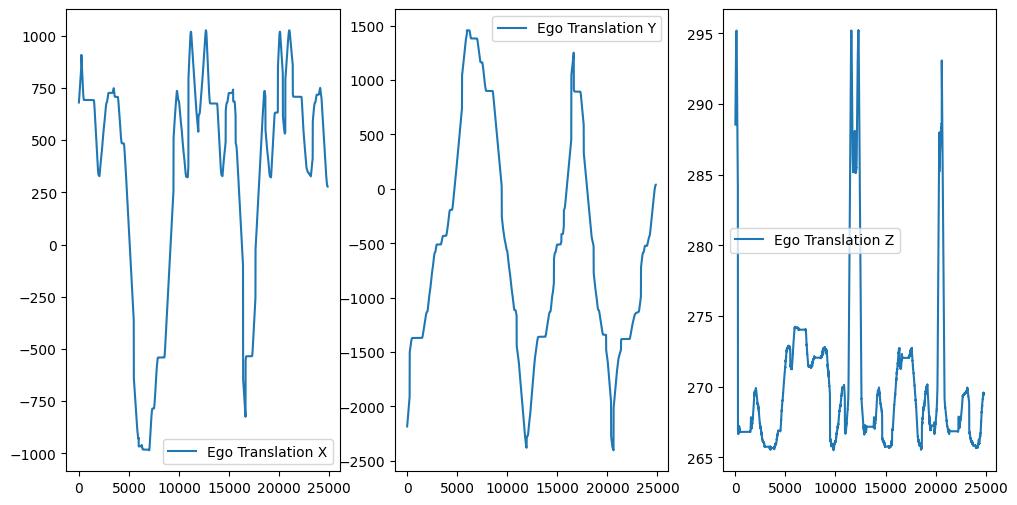

In [ ]:
# 통계적 요약
print(df.describe())

# ego_translation의 x, y, z 값을 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.plot(df["ego_translation_x"], label="Ego Translation X")
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(df["ego_translation_y"], label="Ego Translation Y")
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df["ego_translation_z"], label="Ego Translation Z")
plt.legend()

plt.show()



#ego 차량의 3d위치 데이터 출력. ego차량이 주행하는 동안 시간에 따라 각각 축에 대한 위치정보 변화


In [17]:
!pip show tensorflow
!pip show zarr
!pip show numpy

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\rokey\venv\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Name: zarr
Version: 2.7.0
Summary: An implementation of chunked, compressed, N-dimensional arrays for Python.
Home-page: https://github.com/zarr-developers/zarr-python
Author: 
Author-email: 
License: MIT
Location: d:\rokey\venv\lib\site-packages
Requires: asciitree, fasteners, numcodecs, numpy
Required-by: 
Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: d:\rokey\venv\lib\site-packages
Requires: 
Required-by: contourpy, h5py, keras, matplotlib, ml-dtypes, numcodecs, pandas, scikit-learn, scipy, seaborn, tensorboard, tenso

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler

# 특성 및 목표 변수 준비
features = df[['ego_translation_x', 'ego_translation_y', 'ego_translation_z', 
               'ego_rotation_00', 'ego_rotation_01', 'ego_rotation_02', 
               'ego_rotation_10', 'ego_rotation_11', 'ego_rotation_12']].values
targets = df[['ego_translation_x', 'ego_translation_y', 'ego_translation_z']].shift(-1).dropna().values  # 다음 위치 예측

# 데이터 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# LSTM에 적합한 형식으로 데이터를 변환 (3D 형태: [samples, time_steps, features])
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # (1, number of features)
model.add(LSTM(50))
model.add(Dense(3))  # x, y, z 좌표 예측

# 모델 컴파일
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 예측
predictions = model.predict(X_test)

# 결과 출력
print(predictions)


ImportError: Traceback (most recent call last):
  File "d:\rokey\venv\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 70, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: DLL 초기화 루틴을 실행할 수 없습니다.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

                   ego_translation_x  ego_translation_y  ego_translation_z
ego_translation_x           1.000000          -0.878636          -0.186205
ego_translation_y          -0.878636           1.000000          -0.128650
ego_translation_z          -0.186205          -0.128650           1.000000


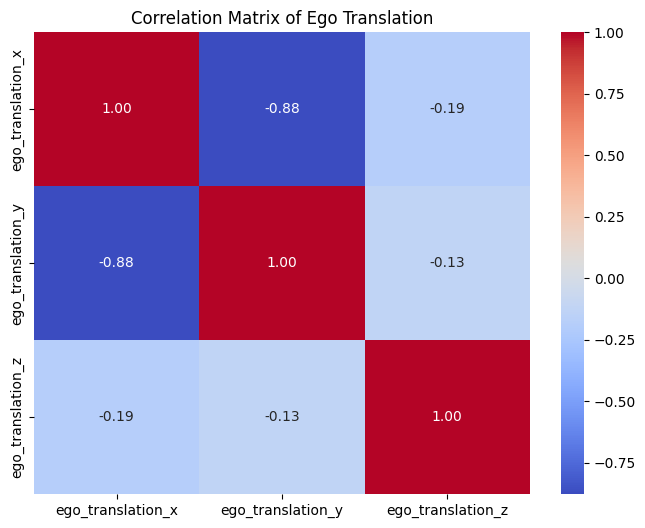

In [ ]:
# # 상관 관계 분석
# correlation_matrix = df[['ego_translation_x', 'ego_translation_y', 'ego_translation_z']].corr()
# print(correlation_matrix)

# #시각화
# import seaborn as sns

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Matrix of Ego Translation")
# plt.show()


In [40]:
!pip install scikit-learn matplotlib

In [17]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# scaler = MinMaxScaler()

# # 시간 값을 0~1 범위로 변환
# df['time_norm'] = scaler.fit_transform(df[['time']])

# X = df[['time_norm']]  # 정규화된 시간 사용
# y_x = df['ego_translation_x']
# y_y = df['ego_translation_y']
# y_z = df['ego_translation_z']

# # 데이터 분할 (train 80%, test 20%)
# X_train, X_test, y_x_train, y_x_test = train_test_split(X, y_x, test_size=0.2, random_state=42)
# X_train, X_test, y_y_train, y_y_test = train_test_split(X, y_y, test_size=0.2, random_state=42)
# X_train, X_test, y_z_train, y_z_test = train_test_split(X, y_z, test_size=0.2, random_state=42)

# # 선형 회귀 모델 생성
# reg_x = LinearRegression()
# reg_y = LinearRegression()
# reg_z = LinearRegression()

# # 모델 학습
# reg_x.fit(X_train, y_x_train)
# reg_y.fit(X_train, y_y_train)
# reg_z.fit(X_train, y_z_train)

# # 예측
# y_x_pred = reg_x.predict(X_test)
# y_y_pred = reg_y.predict(X_test)
# y_z_pred = reg_z.predict(X_test)



In [18]:
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=3)  # 3차 다항 회귀
# X_poly_train = poly.fit_transform(X_train)
# X_poly_test = poly.transform(X_test)

# # 다항 회귀 모델 학습
# reg_x.fit(X_poly_train, y_x_train)
# reg_y.fit(X_poly_train, y_y_train)
# reg_z.fit(X_poly_train, y_z_train)

# # 예측
# y_x_pred = reg_x.predict(X_poly_test)
# y_y_pred = reg_y.predict(X_poly_test)
# y_z_pred = reg_z.predict(X_poly_test)


In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split

# # 입력(X)과 출력(y) 정의
# X = df[['time_norm']]  # 정규화된 시간 데이터
# y_x = df['ego_translation_x']
# y_y = df['ego_translation_y']
# y_z = df['ego_translation_z']

# # 데이터를 훈련/테스트 세트로 나누기
# X_train, X_test, y_train_x, y_test_x = train_test_split(X, y_x, test_size=0.2, random_state=42)
# _, _, y_train_y, y_test_y = train_test_split(X, y_y, test_size=0.2, random_state=42)
# _, _, y_train_z, y_test_z = train_test_split(X, y_z, test_size=0.2, random_state=42)

# # 다항 차수 후보
# degrees = [6, 7, 8]  # 더 높은 차수 실험

# for d in degrees:
#     print(f"\nDegree {d}:")
    
#     for axis, y_train, y_test in zip(['X', 'Y', 'Z'], [y_train_x, y_train_y, y_train_z], [y_test_x, y_test_y, y_test_z]):
#         poly = PolynomialFeatures(degree=d)
#         X_train_poly = poly.fit_transform(X_train)
#         X_test_poly = poly.transform(X_test)

#         model = LinearRegression()
#         model.fit(X_train_poly, y_train)  # 모델 학습
#         y_pred = model.predict(X_test_poly)  # 예측
        
#         mse = mean_squared_error(y_test, y_pred)  # MSE 계산
        
#         print(f"  {axis}-axis MSE: {mse:.4f}")




Degree 6:
  X-axis MSE: 125891.6946
  Y-axis MSE: 107657.8420
  Z-axis MSE: 27.1455

Degree 7:
  X-axis MSE: 123154.8577
  Y-axis MSE: 107644.7950
  Z-axis MSE: 26.4572

Degree 8:
  X-axis MSE: 123147.5237
  Y-axis MSE: 107740.1418
  Z-axis MSE: 26.4507


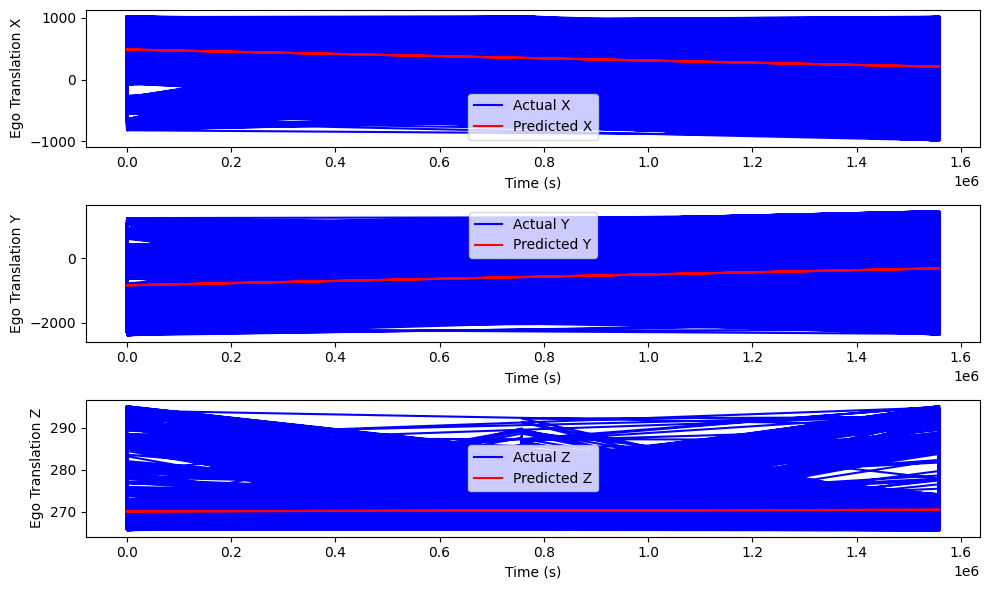

Test data (Actual X, Predicted X): [(338.57354736328125, np.float64(487.6648987002675)), (333.07452392578125, np.float64(352.75131289378066)), (985.9158325195312, np.float64(487.4645810338286)), (-540.6183471679688, np.float64(210.28580142614942)), (-539.1598510742188, np.float64(487.5395376817709))]
Test data (Actual Y, Predicted Y): [(-1135.4033203125, np.float64(-842.2543557168171)), (-1130.728759765625, np.float64(-587.079788623714)), (-1564.2232666015625, np.float64(-841.8754763511173)), (900.6900634765625, np.float64(-317.6215647010763)), (899.1712646484375, np.float64(-842.0172488055007))]
Test data (Actual Z, Predicted Z): [(269.6514587402344, np.float64(270.09355305405757)), (269.6751708984375, np.float64(270.2684127463765)), (267.3570556640625, np.float64(270.0938126831031)), (272.056396484375, np.float64(270.4530603884385)), (272.0509338378906, np.float64(270.0937155327953))]


In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # 데이터프레임에서 ego_translation_x, ego_translation_y, ego_translation_z 컬럼 사용
# # 경로 예측을 위한 데이터 준비
# # 예시로, time_step을 기준으로 차량의 위치 예측

# # DataFrame이 'df'라고 가정 (Ego 차량 위치 데이터)
# # 예시 데이터: df = pd.read_csv('path_to_your_data.csv')

# # 시간 정보 생성 (차량 데이터에서 'timestamp'를 시간처럼 처리)
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ns')  # nanosecond -> datetime
# df['time'] = (df['timestamp'] - df['timestamp'].min()) / np.timedelta64(1, 's')  # 초 단위로 변환

# # x, y, z 좌표 예측을 위한 준비
# X = df[['time']]  # 시간만 사용하여 위치 예측
# y_x = df['ego_translation_x']
# y_y = df['ego_translation_y']
# y_z = df['ego_translation_z']

# # 학습 데이터와 테스트 데이터 분리
# X_train, X_test, y_x_train, y_x_test = train_test_split(X, y_x, test_size=0.2, random_state=42)
# X_train, X_test, y_y_train, y_y_test = train_test_split(X, y_y, test_size=0.2, random_state=42)
# X_train, X_test, y_z_train, y_z_test = train_test_split(X, y_z, test_size=0.2, random_state=42)

# # 선형 회귀 모델
# reg_x = LinearRegression()
# reg_y = LinearRegression()
# reg_z = LinearRegression()

# # 모델 학습
# reg_x.fit(X_train, y_x_train)
# reg_y.fit(X_train, y_y_train)
# reg_z.fit(X_train, y_z_train)

# # 예측
# y_x_pred = reg_x.predict(X_test)
# y_y_pred = reg_y.predict(X_test)
# y_z_pred = reg_z.predict(X_test)

# # 결과 시각화
# plt.figure(figsize=(10, 6))

# # x, y, z 경로 시각화
# plt.subplot(3, 1, 1)
# plt.plot(X_test, y_x_test, label='Actual X', color='blue')
# plt.plot(X_test, y_x_pred, label='Predicted X', color='red')
# plt.xlabel('Time (s)')
# plt.ylabel('Ego Translation X')
# plt.legend()

# plt.subplot(3, 1, 2)
# plt.plot(X_test, y_y_test, label='Actual Y', color='blue')
# plt.plot(X_test, y_y_pred, label='Predicted Y', color='red')
# plt.xlabel('Time (s)')
# plt.ylabel('Ego Translation Y')
# plt.legend()

# plt.subplot(3, 1, 3)
# plt.plot(X_test, y_z_test, label='Actual Z', color='blue')
# plt.plot(X_test, y_z_pred, label='Predicted Z', color='red')
# plt.xlabel('Time (s)')
# plt.ylabel('Ego Translation Z')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # 결과 출력 (테스트 데이터와 예측된 값 비교)
# print(f"Test data (Actual X, Predicted X): {list(zip(y_x_test[:5], y_x_pred[:5]))}")
# print(f"Test data (Actual Y, Predicted Y): {list(zip(y_y_test[:5], y_y_pred[:5]))}")
# print(f"Test data (Actual Z, Predicted Z): {list(zip(y_z_test[:5], y_z_pred[:5]))}")
